## Part of Speech

In [1]:
from nltk import pos_tag
from nltk.tokenize import word_tokenize, sent_tokenize

In [2]:
txt = 'We are so grateful to you for having killed the Wicked Witch of the East, and for setting our people free from bondage.'

txt_pos = pos_tag(word_tokenize(txt.lower()))
txt_pos

[('we', 'PRP'),
 ('are', 'VBP'),
 ('so', 'RB'),
 ('grateful', 'JJ'),
 ('to', 'TO'),
 ('you', 'PRP'),
 ('for', 'IN'),
 ('having', 'VBG'),
 ('killed', 'VBN'),
 ('the', 'DT'),
 ('wicked', 'JJ'),
 ('witch', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('east', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('for', 'IN'),
 ('setting', 'VBG'),
 ('our', 'PRP$'),
 ('people', 'NNS'),
 ('free', 'VBP'),
 ('from', 'IN'),
 ('bondage', 'NN'),
 ('.', '.')]

## Chunking

In [3]:
from nltk import RegexpParser

### Noun phrase

In [4]:
# Noun phrases
# NP is a user-defined name for the chunks we're looking for
chunk_grammar = "NP: {<DT>?<JJ>*<NN>}"

chunk_parser  = RegexpParser(chunk_grammar)

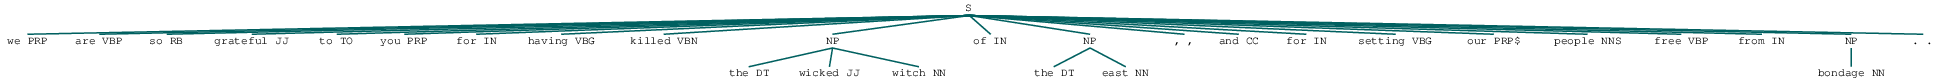

In [5]:
chunks = chunk_parser.parse(txt_pos)
chunks
# Double-click on the image to see it fully

In [6]:
for subtree in chunks.subtrees():
    if subtree.label() == 'NP':
        print(tuple(subtree))

(('the', 'DT'), ('wicked', 'JJ'), ('witch', 'NN'))
(('the', 'DT'), ('east', 'NN'))
(('bondage', 'NN'),)


In [7]:
trees = [" ".join([w[0] for w in tree.leaves()])
    for tree in chunks.subtrees()
    if tree.label() == 'NP']
trees

['the wicked witch', 'the east', 'bondage']

### On entire document

In [ ]:
!wget http://dev.gutenberg.org/files/55/55.txt -O oz.txt

In [8]:
txt = open('oz.txt', 'r').read()

k = txt.find('*** START')
if k != -1:
    k   = txt.find('\n', k)
    txt = txt[k:]

k = txt.find('*** END')
if k != -1:
    txt = txt[:k]

sentences = sent_tokenize(txt)
len(sentences)

1624

In [9]:
from collections import Counter
import re

In [10]:
re_punc        = re.compile('[^0-9a-zA-Z .]')
chunk_grammar  = "NP: {<DT>?<JJ>*<NN>}"

chunk_parser  = RegexpParser(chunk_grammar)
chunk_counter = Counter()

for sentence in sentences:
    txt     = re.sub(re_punc, ' ', sentence.lower())
    txt_pos = pos_tag(word_tokenize(txt))
    chunks  = chunk_parser.parse(txt_pos)

    chunk_counter.update([
        " ".join([w[0] for w in subtree.leaves()])
        for subtree in chunks.subtrees()
        if subtree.label() == 'NP'])

chunk_counter.most_common(30)

[('i', 288),
 ('the scarecrow', 212),
 ('dorothy', 179),
 ('the lion', 148),
 ('the tin', 123),
 ('woodman', 112),
 ('oz', 72),
 ('toto', 68),
 ('the wicked witch', 58),
 ('the woodman', 57),
 ('head', 55),
 ('the emerald city', 52),
 ('the witch', 49),
 ('the girl', 46),
 ('chapter', 41),
 ('the road', 41),
 ('room', 30),
 ('s', 29),
 ('the air', 29),
 ('nothing', 28),
 ('t', 27),
 ('the country', 26),
 ('the land', 24),
 ('a heart', 24),
 ('the sun', 22),
 ('the west', 22),
 ('course', 22),
 ('axe', 22),
 ('the cowardly lion', 21),
 ('aunt', 21)]

## Named Entity Recognition

### Using NLTK

In [ ]:
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')

In [11]:
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk import ne_chunk

In [12]:
txt = 'Prime Minister Narendra Modi on Tuesday announced the 20 Lakh Crore package for the India to fight against the coronavirus pandemic.'
txt

'Prime Minister Narendra Modi on Tuesday announced the 20 Lakh Crore package for the India to fight against the coronavirus pandemic.'

In [13]:
txt_pos = pos_tag(word_tokenize(txt))
res     = ne_chunk(txt_pos, binary=False)
print(res)

(S
  Prime/NNP
  Minister/NNP
  (PERSON Narendra/NNP Modi/NNP)
  on/IN
  Tuesday/NNP
  announced/VBD
  the/DT
  20/CD
  Lakh/NNP
  Crore/NNP
  package/NN
  for/IN
  the/DT
  (GPE India/NNP)
  to/TO
  fight/VB
  against/IN
  the/DT
  coronavirus/NN
  pandemic/NN
  ./.)


### Using spacy

In [ ]:
!python -m spacy download en_core_web_sm

In [14]:
import spacy

In [15]:
nlp = spacy.load('en_core_web_sm')

In [16]:
txt

'Prime Minister Narendra Modi on Tuesday announced the 20 Lakh Crore package for the India to fight against the coronavirus pandemic.'

In [17]:
doc = nlp(txt)

for ent in doc.ents:
    print(ent.text, ent.label_)

Narendra Modi PERSON
Tuesday DATE
20 CARDINAL
Lakh Crore ORG
India GPE


In [18]:
spacy.displacy.render(doc, style='ent')

## Dependency grammar tree

In [19]:
from nltk import Tree

In [20]:
def to_nltk_tree(node):
    if node.n_lefts + node.n_rights > 0:
        parsed_child_nodes = [to_nltk_tree(child) for child in node.children]
        return Tree(node.orth_, parsed_child_nodes)
    else:
        return node.orth_

In [21]:
for sent in doc.sents:
    to_nltk_tree(sent.root).pretty_print()

                                       announced                                                 
  _________________________________________|______________                                        
 |            |               |                        package                                   
 |            |               |      _____________________|__________                             
 |            |               |     |      |       |               fight                         
 |            |               |     |      |       |       __________|__________                  
 |           Modi             |     |      |       |      |     |    |       against             
 |      ______|______         |     |      |       |      |     |    |          |                 
 |     |          Minister    on    |      |     Crore    |     |  India     pandemic            
 |     |             |        |     |      |       |      |     |    |     _____|__________       
 .  Narendra   

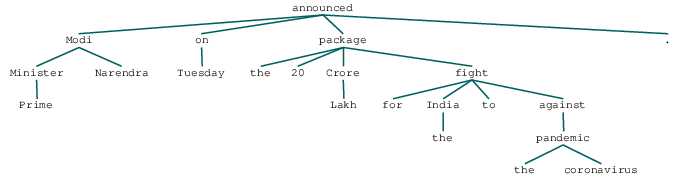

In [22]:
for sent in doc.sents:
    display(to_nltk_tree(sent.root))